In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('train_final_complete.csv')
df_test = pd.read_csv('test_final_complete_cleaned.csv')

In [3]:
X_train = df_train[['built_year', 'num_beds', 'num_baths', 'lat', 'lng', 'size_sqft',
                    'tenure_group', 'subzone_per_price_encoded',
                    'property_type_ordinal',
                    #mrt
                    'dist_to_nearest_important_mrt_rounded',
                    #schools
                    'number_of_nearby_primary_schools', 
                    'number_of_nearby_secondary_schools', 
                    #shopping mall
                    'number_of_nearby_shopping_malls',
                    #CR
                    #'name_of_nearest_IHL_ordinal',
                    'name_of_nearest_BN_ordinal',
                    'name_of_nearest_CR_ordinal']]
y_train = df_train['per_price']

In [4]:
segments = [0, 600, 1200, 1800, 2400, 3000, len(y_train)]
sizes = X_train['size_sqft']

# Random Forest

In [5]:
best_random_forest_regressor = RandomForestRegressor(max_depth=50, max_features=8, n_estimators=200)
best_random_forest_regressor.fit(X_train, y_train)
random_forest_predicted = best_random_forest_regressor.predict(X_train)

In [7]:
random_forest_mses = [0] * 6
for i in range(len(segments)-1):
    size_segment = sizes[segments[i]:segments[i+1]+1]
    ground_truth_segment = y_train[segments[i]:segments[i+1]+1]
    predicted_segment = random_forest_predicted[segments[i]:segments[i+1]+1]
    random_forest_mses[i] = mean_squared_error(ground_truth_segment * size_segment, predicted_segment * size_segment)
print(random_forest_mses)

[455142255247.7259, 1161331727297.436, 278506013420.03107, 202989535428.77975, 183068184268.74814, 496522821638.1379]


# Gradient Boosting

In [8]:
best_gradient_boosting_regressor = GradientBoostingRegressor(learning_rate=0.5, max_depth=4, n_estimators=400)
best_gradient_boosting_regressor.fit(X_train, y_train)
gradient_boosting_predicted = best_gradient_boosting_regressor.predict(X_train)

In [9]:
gradient_boosting_mses = [0] * 6
for i in range(len(segments)-1):
    size_segment = sizes[segments[i]:segments[i+1]+1]
    ground_truth_segment = y_train[segments[i]:segments[i+1]+1]
    predicted_segment = gradient_boosting_predicted[segments[i]:segments[i+1]+1]
    gradient_boosting_mses[i] = mean_squared_error(ground_truth_segment * size_segment, predicted_segment * size_segment)
print(gradient_boosting_mses)

[79913690001.42337, 1163809513355.1902, 55304975911.40357, 68884645473.2148, 169838116155.28162, 116623529593.0855]


# Comparison

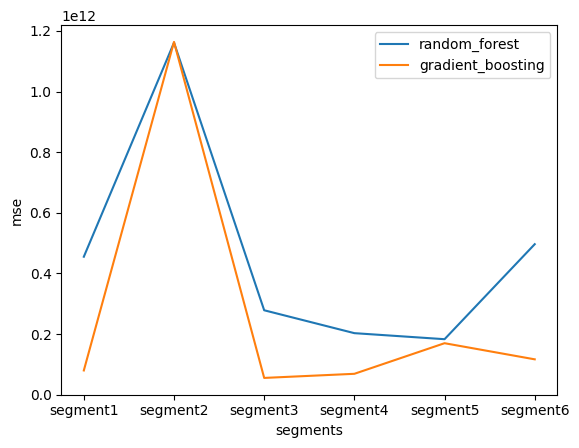

In [10]:
x_axis = ["segment1", "segment2", "segment3", "segment4", "segment5", "segment6"]
random_forest_line = plt.plot(x_axis, random_forest_mses, label='random_forest')
gradient_boosting_line = plt.plot(x_axis, gradient_boosting_mses, label='gradient_boosting')
plt.xlabel("segments")
plt.ylabel("mse")
plt.legend()
plt.show()